# Project: Wrangling and Analyze Data

In [1]:
# let's import our libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import time
import datetime
import requests
import json
import tweepy
import io
import os

## Data Gathering

In the cell below, gather **all** three pieces of data for this project and load them in the notebook.

**Note:** the methods required to gather each data are different.
    
1. Directly download the WeRateDogs Twitter archive data (twitter-archive-enhanced.csv)    

In [2]:
# Gathering the data

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Looking at the information in our data
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the image prediction file (image_predictions.tsv)

In [4]:
# URL downloaded programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Opening a tsv file and saving the response content
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

# Looking at the information in our data
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

# Get the API object which we will use to gather the twitter data
import tweepy

consumer_key = 'SECRET'
consumer_secret = 'SECRET'
access_token = 'SECRET'
access_secret = 'SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# Check the total numbers of tweet IDs
len(list(twitter_archive.tweet_id))

2356

In [7]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149],
      dtype=int64)

In [11]:
# Query Twitter's API for the JSON data of each tweet ID in the Twitter archive
index = 0
# dictionary to catch the errors
error_dict = {}
start = time.time()

# Save each tweet's returned JSON as a new line in a .txt file
with open ('tweet_json.txt', 'w') as tweet_bk:
    # This will likely take 20 - 30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        index += 1
        try:
            # Get the status data for each of the tweet IDs
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print(str(index) + ": " + "ID - " + str(tweet_id))
            # Convert each tweet status to JSON string and save it in the tweet_bk file
            json.dump(tweet._json, tweet_bk)
            # recognize \n as a break of text
            tweet_bk.write("\n")
            
        # Catching errors that might occur while accessing the tweet data or content
        except tweepy.TweepyException as error:
            print(str(index) + ": " + "ID - " + str(tweet_id) + " has an error:", error.response.text)
            # Appending the errors to the dictionary; error_dict
            error_dict[tweet_id] = error
            
end = time.time()
print(end - start)

1: ID - 892420643555336193 has an error: {"errors":[{"code":89,"message":"Invalid or expired token."}]}
2: ID - 892177421306343426 has an error: {"errors":[{"code":89,"message":"Invalid or expired token."}]}
3: ID - 891815181378084864 has an error: {"errors":[{"code":89,"message":"Invalid or expired token."}]}
4: ID - 891689557279858688 has an error: {"errors":[{"code":89,"message":"Invalid or expired token."}]}
5: ID - 891327558926688256 has an error: {"errors":[{"code":89,"message":"Invalid or expired token."}]}
6: ID - 891087950875897856 has an error: {"errors":[{"code":89,"message":"Invalid or expired token."}]}
7: ID - 890971913173991426 has an error: {"errors":[{"code":89,"message":"Invalid or expired token."}]}
8: ID - 890729181411237888 has an error: {"errors":[{"code":89,"message":"Invalid or expired token."}]}
9: ID - 890609185150312448 has an error: {"errors":[{"code":89,"message":"Invalid or expired token."}]}
10: ID - 890240255349198849 has an error: {"errors":[{"code":89,

In [12]:
# Extract the missing columns from enhanced twitter archive

# Empty list to convert to DataFrame
df_list = []

# Open text file for reading
with open ('tweet_json.txt', 'r') as json_file:
    for line in json_file.readlines():
        # Read each JSON string status into a dictionary and reading each line as a dictionary
        each_tweet_line = json.loads(line)
        # Getting the required parameters
        tweet_id = each_tweet_line['id']
        retwt_count = each_tweet_line['retweet_count']
        fav_count = each_tweet_line['favorite_count']
        follows_count = each_tweet_line['user']['followers_count']
        frnds_count = each_tweet_line['user']['friends_count']
        
        df_list.append({'id': tweet_id,
                       'retweet_count': retwt_count,
                       'favorite_count': fav_count,
                       'followers_count': follows_count,
                       'friends_count': frnds_count})
        
tweet_json = pd.DataFrame(df_list, columns=['id', 'retweet_count', 'favorite_count', 'followers_count', 'friends_count'])

In [13]:
df_list

[]

## Data Assessing

In this section, detect and document at least **eight (8) quality and two (2) tidiness issues.** You must use **both** visual sssessment and programmatic assessment to assess the data.

**Note**: pay attention to the following key points when you access the data.
    
 - You only want original ratings (no retweets) that have images. Though there are 5000+ tweeets in the dataset, not all are dog ratings and some are retweets.

 - Accessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
    
 - The fact that rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.

 - You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

### Visual Assessment

Each piece of gathered data is displayed in the Jupyter Notebook for visual assesment purposes.

In [14]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### twitter_archive columns description:

 - **tweet_id** --> the unique identifier for each tweet
    
 - **in_reply_to_status_id** --> if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
 
 - **in_reply_to_user_id** --> if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
 
 - **timestamp** --> time when this Tweet was created
    
 - **source** --> utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
 
 - **text** --> actual UTF-8 text of the status update
    
 - **retweeted_status_id** --> if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
    
 - **retweeted_status_user_id** --> if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
    
 - **retweeted_status_timestamp** --> time of retweet
    
 - **expanded_urls** --> tweet URL
    
 - **rating_numerator** --> numerator of the rating of a dog. Note: ratings almost always greater than 10
        
 - **rating_denominator** --> denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
        
 - **name** --> name of the dog
    
 - **doggo** --> one of the 4 dog "stage"
    
 - **floofer** --> one of the 4 dog "stage"
    
 - **pupper** --> one of the 4 dog "stage"
    
 - **puppo** --> one of the 4 dog "stageColumns description:

In [15]:
image_prediction.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### image_prediction columns description:

 - **tweet_id** --> the unique identifier for each tweet
    
 - **jpg_url** --> dog's image URL
    
 - **img_num** --> the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
    
 - **p1** --> algorithm's #1 prediction for the image in the tweet
    
 - **p1_conf** --> how confident the algorithm is in its #1 prediction
    
 - **p1_dog** --> whether or not the #1 prediction is a breed of dog
    
 - **p2** --> algorithm's #2 prediction for the image in the tweet
    
 - **p2_conf** --> how confident the algorithm is in its #2 prediction
    
 - **p2_dog** --> whether or not the #2 prediction is a breed of dog
    
 - **p3** --> algorithm's #3 prediction for the image in the tweet
    
 - **p3_conf** --> how confident the algorithm is in its #3 prediction
    
 - **p3_dog** --> whether or not the #3 prediction is a breed of dog

In [16]:
tweet_json

,id,retweet_count,favorite_count,followers_count,friends_count


#### tweet_json columns description

 - **id** --> the unique identifier for each tweet
        
 - **retweet_count** --> the number of times the original tweet was retweeted
    
 - **favorite_count** --> the number of times the the original tweet was loved or liked
    
 - **followers_count** --> the number of followers of WeRataeDogs account as at the time of the each tweet
    
 - **friends_count** --> the number of profiles WeRateDogs account was following at the time of each tweet

### Programmatic Assessment

Using pandas' functions and/or methods to assess each gathered data.

In [21]:
# Looking at the concise summary of our twitter_archive data
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
# Looking at the concise summary of our image_prediction data
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
# Looking at the concise summary of our tweet_json data
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               0 non-null      object
 1   retweet_count    0 non-null      object
 2   favorite_count   0 non-null      object
 3   followers_count  0 non-null      object
 4   friends_count    0 non-null      object
dtypes: object(5)
memory usage: 0.0+ bytes


In [24]:
# Looking at the statistical description of our twitter_archive data
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [25]:
# Looking at the statistical description of our image_prediction data
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
# Get the number of rows and columns in twitter_archive dataframe
twitter_archive.shape

(2356, 17)

In [27]:
# Get the number of rows and columns in image_prediction dataframe
image_prediction.shape

(2075, 12)

In [28]:
# Get the number of rows and columns in tweet_json dataframe
tweet_json.shape

(0, 5)

In [29]:
# Get the number of missing values in our twitter_archive data
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [30]:
# Get the number of missing values in our image_prediction data
image_prediction.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [31]:
# Get the number of missing values in our tweet_json data
tweet_json.isnull().sum()

id                 0.0
retweet_count      0.0
favorite_count     0.0
followers_count    0.0
friends_count      0.0
dtype: float64

In [32]:
# Get the numbe rof unique values in the columns in our twitter_archive data
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [33]:
# Get the number of unique values in the columns in our image_prediction data
image_prediction.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [34]:
# Get the number of unique values in the columns in our tweet_json data
tweet_json.nunique()

id                 0
retweet_count      0
favorite_count     0
followers_count    0
friends_count      0
dtype: int64

In [35]:
# Get the number of duplicate rows in our twitter_archive data
twitter_archive.duplicated().sum()

0

In [36]:
# Get the number of duplicate rows in our image_prediction data
image_prediction.duplicated().sum()

0

In [37]:
# Get the number of duplicate rows in our tweet_json data
df3.duplicated().sum()

0

In [38]:
# Checking for IDs with values in retweet_status_id, retweeted_status_user_id, and
# retweeted_status_timestamp columns
twitter_archive[twitter_archive['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


### Quality issues

#### twitter_archive 

 -  missing values in expanded_urls column
 
 
 - 'name' values that are all lowercase are invalid entries (i.e. not dog names). Confirmed that the dogs names that started with a lower case are not dog names
 
 
 - retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns contain mostly missing values
 
 
 - Erroneous data type (tweet id column is an integer(int) instead of string(str))
 
 
 - in_reply_to_status_id and in_reply_to_user_id columns contain mostly missing values
 
 
 - There are tweet IDs that have 'retweeted_status_id, retweeted_status_user _id, and retweeted_status _timestamp values. These ids are that of retweets and won't be used for our analysis


 - Erroneous data type (timestamp column is in integer(int) instead of datetime)
 
 
 #### image_predictions 

 - Erroneous data type (tweet id column is an integer(int) instead of string(str))
 
 
 - Values in columns 'p1', 'p2', and 'p3' don't have consistent format
 
 
#### tweet_json 
 
 - Erroneous data type (tweet id column is an integer(int) instead of string(str))

### Tidiness issues

#### twitter_archive 

 - 4 columns (doggo, floofer, pupper, puppo) are categories of dog "stage" and need to be one column "stage" with 4 
 
   categories: doggo, floofer, pupper and puppo 
  
 
#### tweet_json

 - followers_count column has only 24 values  and friends_count columns contains only 1 value.
 
 
#### General

 - The column label for tweet IDs should be the same across the three datasets.
 
 
 - The three tables should be combined as one single dataset

## Data Cleaning

In this section, clean all of the issues you documented while assessing.

**Note**: Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [39]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

### Missing Values

**Issue #1**

There are tweet IDs that have 'retweeted_status_id, retweeted_status_user _id, and retweeted_status _timestamp values. These ids are that of retweets and won't be used for our analysis.

**Define**:

Remove tweet IDs that have 'retweeted_status_id, retweeted_status_user _id, and retweeted_status _timestamp values. These ids are that of retweets and won't be used for our analysis.

**Code**:

In [41]:
# Drop retweeted rows
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]

**Test**:

In [42]:
# Check if the retweets have been droped
print(twitter_archive_clean.retweeted_status_id.notnull().sum())
print(twitter_archive_clean.retweeted_status_user_id.notnull().sum())
print(twitter_archive_clean.retweeted_status_timestamp.notnull().sum())

0
0
0


**Issue**:

- retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns contain mostly missing values.

- in_reply_to_status_id and in_reply_to_user_id columns contain mostly missing values.

- missing values in expanded_urls column

**Define**:
    
- Drop retweeted_status_id,  retweeted_status_user_id,  retweeted_status_timestamp,  in_reply_to_status_id  and  in_reply_to_user_id columns because they have over 90% of missing values each

- Drop the expanded_urls column as it won't be useful for our analysis.

**Code**:

In [43]:
# Make a list of the columns to be dropped
drop_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', \
             'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls']

# Drop the columns 
twitter_archive_clean.drop(drop_list, axis=1, inplace=True)

**Test**:

In [44]:
# Check our cleaning effort to confirm if the columns have been dropped
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


In [45]:
# Check our cleaning effort to confirm if we no longer have missing values
twitter_archive_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Tidiness issues

**Issue**:

- 4 columns (doggo, floofer, pupper, puppo) are categories of dog 'stage' and need to be one column 'stage' with 4 categories: doggo, floofer, pupper and puppo in it.

**Define**:

- Create a new variable – ‘stage’ to show the four dog stages, drop the four columns, and fill the empty with NaN.

**Code**:

In [46]:
# First replace None in stage columns with empty string as follows
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

# Then combine stage columns
twitter_archive_clean['stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo


# Then format entries with multiple dog stages which appeared like doggopuppo
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [47]:
# Checking if entries with multiple dog stages were formatted
twitter_archive_clean.stage.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [48]:
# Drop the old columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#  Use np.nan to fill the empty spaces
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace('', np.nan)

**Test**:

In [49]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


**Issue**:

- Followers_count column has only 24 values and friends_count columns contains only 1 value.

**Define**:
    
- Drop followers_count and friends_count columns as they don't contain necessary values that would be relevant to the analysis.

**Code**:

In [51]:
tweet_json_clean.drop(['followers_count', 'friends_count'], axis=1, inplace=True)

**Test**:

In [53]:
tweet_json_clean.head()

,id,retweet_count,favorite_count


**Issue**

- Erroneous data type (timestamp column is in int instead of datetime)

**Define**:

- Convert the timestamp column from an int to datetime.

**Code**:

In [54]:
# Convert timestamp column to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

**Test**:

In [55]:
# Check if our cleaning effort worked
twitter_archive_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                    int64
rating_denominator                  int64
name                               object
stage                              object
dtype: object

**Issue**:

- Erroneous data type (tweet id column is in integer (int) instead of string (str))

**Define**:
    
- Convert tweet_id column from integer to string

**Code**:

In [56]:
# Convert tweet_id column to string
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

**Test**:

In [57]:
# Check if our cleaning effort worked
twitter_archive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                    int64
rating_denominator                  int64
name                               object
stage                              object
dtype: object

**Issue**

- 'name' values that are all lowercase are invalid entries (i.e. not dog names)

- Confirmed that the dogs names that started with a lower case are not dog names

**Define**:
    
- Drop all values in the name column that started with small letters

**Code**:

In [58]:
# Create a list to contain all the names that starts with lowercase
notNames = []

for c in twitter_archive_clean.name:
    if c.islower() and c not in notNames:
        notNames.append(c)
    
print(notNames)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [59]:
# Replace the names that start with lower case with the word "None
twitter_archive_clean.name.replace(notNames, 'None', inplace=True)

In [61]:
# Nothing prints when this code is run, So the lowercase entries are cleared.
for c in twitter_archive_clean.name:
    if c.islower():
        print(c)

In [62]:
# Sample from edited 'name' and run a few times
twitter_archive_clean['name'].sample(10)

1694       Sarge
8           Zoey
979      Atticus
280      Winston
2192      Herald
1545        None
1855       Ellie
2148    Clarence
65        Bailey
783      Maximus
Name: name, dtype: object

**Issue**:

- Erroneous data type (tweet id column is in int instead of string)

**Define**:
    
- Convert tweet_id column in image prediction table to a string.

**Code**:

In [63]:
# Covert the tweet_id column in image_prediction dataframe to string
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

**Test**:

In [64]:
# check if our cleaning effort worked
image_predictions_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

**Issue**:

- Values in columns 'p1', 'p2', and 'p3' don't have consistent format

**Define**:
    
- Change all p1, p2, and p3 values to lower case.

**Code**:

In [65]:
# Change the p1, p2, and p3 values all to lower case.
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

In [66]:
# Display some rows to check if our cleaning effort worked
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1061,715200624753819648,https://pbs.twimg.com/media/CeznK6IWEAEFUPq.jpg,1,chihuahua,0.956787,True,beagle,0.008383,True,labrador_retriever,0.008344,True
1068,715928423106027520,https://pbs.twimg.com/media/Ce99GhLW8AAHG38.jpg,1,pug,0.976685,True,french_bulldog,0.019663,True,bull_mastiff,0.002278,True
123,668226093875376128,https://pbs.twimg.com/media/CUYEFlQXAAUkPGm.jpg,1,trombone,0.390339,False,cornet,0.314149,False,french_horn,0.255182,False
78,667443425659232256,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False
527,676617503762681856,https://pbs.twimg.com/media/CWPUB9TWwAALPPx.jpg,1,chihuahua,0.841084,True,pomeranian,0.120530,True,pekinese,0.006600,True


In [67]:
# Checking further programatically
image_predictions_clean.p1.str.islower().count()
image_predictions_clean.p2.str.islower().count()
image_predictions_clean.p3.str.islower().count()

2075

**Issue**:

- Erroneous data type (tweet_id column is in int instead of string)

**Define**:
    
- Convert tweet_id coulmn in the tweet_json dataframe from integer to string

**Code**:

In [78]:
# Convert id column to string datatype
df3_clean['id'] = df3_clean['id'].astype(str)

**Test**:

In [79]:
# Check if our cleaning effort worked
df3_clean.dtypes

id                object
retweet_count      int64
favorite_count     int64
dtype: object

**Issue**:

- The column label for tweet IDs should be the same across the three separate datasets.

**Define**:
    
- Change the column label from 'id' to 'tweet_id' in tweet_json(df3) dataset.

In [69]:
tweet_json_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

**Issue**:

- The three dataframe should be combined as one single dataset

**Define**:
    
- Merge the three dataframes to become one dataframe and merge them on tweet_id column

**Code**:

In [80]:
df_merged = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id', how='inner')

In [95]:
df_merged1 = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id', how='inner').merge(tweet_json_clean, on='tweet_id', how='inner' )

In [97]:
df_merged1.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [98]:
df_merged1.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

**Test**:

In [81]:
df_merged.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

In [82]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   rating_numerator    1994 non-null   int64              
 5   rating_denominator  1994 non-null   int64              
 6   name                1994 non-null   object             
 7   stage               306 non-null    object             
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   int64              
 10  p1                  1994 non-null   object             
 11  p1_conf             1994 non-null   float64            
 12  p1_dog              1994 non-null 

## Storing Data

Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [83]:
# Saving the master dataset to a csv file
df_merged.to_csv("twitter_archive_master.csv", index=False)

In [84]:
# Check if it was properly saved
df = pd.read_csv("twitter_archive_master.csv")

In [85]:
df.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


## Analyzing and Visualizing

In this section, analyze and visualize your wrangled data. You must produce at least three (3) insights and visualizations.

In [86]:
# Looking at the statistical description of our master dataset
df.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03
mean,7.358508e+17,12.280843,10.532096,1.203109,0.593941,1.344195e-01,6.024848e-02
std,6.747816e+16,41.497718,7.320710,0.560777,0.271954,1.006807e-01,5.089067e-02
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758475e+17,10.000000,10.000000,1.000000,0.362857,5.393987e-02,1.619283e-02
50%,7.084748e+17,11.000000,10.000000,1.000000,0.587635,1.174550e-01,4.950530e-02
75%,7.877873e+17,12.000000,10.000000,1.000000,0.846285,1.951377e-01,9.159438e-02
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [87]:
# Get the mean value of the dog names
df.name.value_counts() / df.shape[0] * 100

None          32.296891
Charlie        0.551655
Cooper         0.501505
Lucy           0.501505
Oliver         0.501505
                ...    
Leela          0.050150
Glenn          0.050150
Shelby         0.050150
Sephie         0.050150
Christoper     0.050150
Name: name, Length: 914, dtype: float64

#### Insights:

 - 1. About 32% of the dogs have no name

 - 2. Image number 1 is the most prominent (frequent)

#### Visualizations

#### Question 1: How many image number occured most for each tweet's most confident image prediction?

C:\Users\blvck_Sand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'The Distribution of Tweet Image Number')

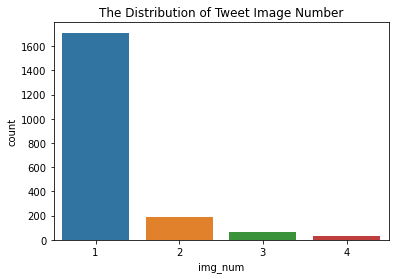

In [88]:
# Let's use countplot to get the distribution of the most frequent image number that corresponds 
# to the most confident prediction
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df.img_num)
plt.title('The Distribution of Tweet Image Number')

In [89]:
# Get the value count of each image number value
df.img_num.value_counts()

1    1711
2     191
3      62
4      30
Name: img_num, dtype: int64

The above graph shows that the most occcuring image number that corresponds to each tweet's most confident prediction is 1.

#### Question 2: What is the most popular dog stage according to the neural  network's image prediction?

Text(0.5, 1.0, 'The Distribution of Dog Stages')

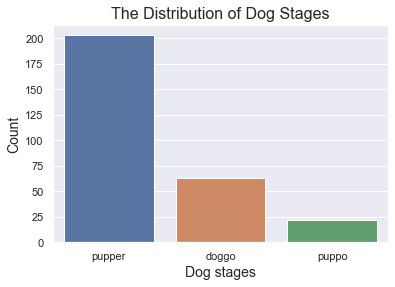

In [90]:
sns.set(style = 'darkgrid')
sorted_age = df['stage'].value_counts().head(3).index
sns.countplot(data = df, x ='stage', order = sorted_age, orient='h')
plt.xlabel('Dog stages', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('The Distribution of Dog Stages', fontsize=16)

In [91]:
# Get the value count of each dog stage
df.stage.value_counts()

pupper           203
doggo             63
puppo             22
doggo,pupper       9
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

Looking at the distribution of dog images, it shows that 'pupper' (a small doggo, usually younger) is the most popular dog stage, followed by 'doggo' and 'puppo'. It could be due to the fact that young and unmatured dog is usually cuter than the adult dog. It should also be noticed that there's huge amount of missing data in the dog stages, thus the distribution may not reflect the truth.

#### Question 3: Does retweet count positively correlate with favourite count?

In [92]:
df.corr(method='pearson')

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
tweet_id,1.000000,0.023630,-0.022426,0.212854,0.106469,0.120656,-0.002557,0.123795,-0.049237,0.097677
rating_numerator,0.023630,1.000000,0.198240,-0.000684,-0.009049,-0.029150,-0.020724,-0.034601,-0.004173,-0.029355
rating_denominator,-0.022426,0.198240,1.000000,-0.004094,-0.004240,0.000640,-0.034964,-0.000709,0.007071,0.004695
img_num,0.212854,-0.000684,-0.004094,1.000000,0.204406,0.032674,-0.156773,0.052354,-0.141409,0.062725
p1_conf,0.106469,-0.009049,-0.004240,0.204406,1.000000,0.126961,-0.509531,0.142268,-0.707994,0.119391
p1_dog,0.120656,-0.029150,0.000640,0.032674,0.126961,1.000000,0.109214,0.635698,0.045770,0.558604
p2_conf,-0.002557,-0.020724,-0.034964,-0.156773,-0.509531,0.109214,1.000000,0.096064,0.480743,0.063713
p2_dog,0.123795,-0.034601,-0.000709,0.052354,0.142268,0.635698,0.096064,1.000000,0.033552,0.554644
p3_conf,-0.049237,-0.004173,0.007071,-0.141409,-0.707994,0.045770,0.480743,0.033552,1.000000,0.032731
p3_dog,0.097677,-0.029355,0.004695,0.062725,0.119391,0.558604,0.063713,0.554644,0.032731,1.000000


The data used for the above `analysis` and `visualizations` is the final merged data which was later saved as twitter_archive_master.csv. 